# Monte Carlo Markov-chain 
* The Metropolis algorithm (symmetric proposal distribution) allows us to sample from a distribution $p(\mathbf x)$ where $\mathbf x$ is a n-dimensional vector
* It is sufficient to know a function $f(\mathbf x)$ which is proportional to the pdf $p(\mathbf x)$

$$
f(x) = a \, p(x)
$$

* On could determine the value of $a$, since $\int_ℝ f(\mathbf x) \, d\mathbf x = a$, but in high dimensional spaces, this integral can be intractable  


In [1]:
using PyPlot

* Assume that we have two dimensional variables
* And we want to sample from a Gaussian distribution

In [2]:
n = 2;

f(x) = exp(- (x' * x))

f (generic function with 1 method)

Let's plot lines of constant propability

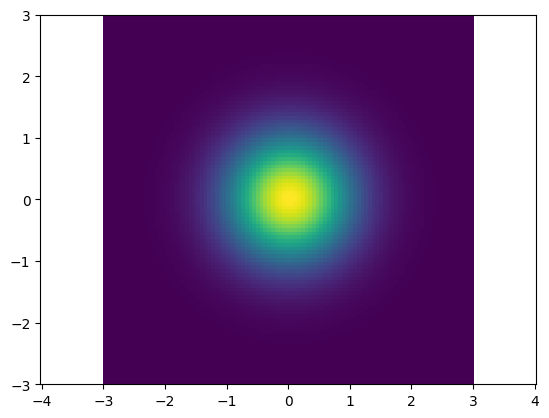

In [3]:
function plotF(f, Fx = range(-3,stop=3,length=100), Fy = range(-3,stop=3,length=100))
    F = zeros(length(Fx),length(Fy))
    for j = 1:length(Fy)
       for i = 1:length(Fx)
            F[i,j] = f([Fx[i]; Fy[j]]) 
        end
    end
    pcolor(Fx,Fy,copy(F'))
    axis("equal")
    return Fx,Fy,F
end

Fx,Fy,F = plotF(f);

## The Metropolis algorithm

1. Pick a starting point $\mathbf x_0$
2. Choose the next point by sampling from $g(\mathbf  x' | \mathbf x_i)$
3. Compute the acceptance ratio
$$
α = \frac{f(\mathbf x')}{f(\mathbf x_i)}
$$
4. Generate a random number $u$ from the uniform distribution [0,1]
5. if  $u \le α$ is accept the candidate: $\mathbf x_{i+1}$ = $\mathbf x'$
   Otherwise  $\mathbf x_{i+1}$ = $\mathbf x_{i}$

Note:

* $g(\mathbf  x | \mathbf y)$ represent the probability to go from $\mathbf y$ to $\mathbf x$.
* The the Metropolis algorithm, it is required $g(\mathbf  x | \mathbf y) = g(\mathbf  y | \mathbf x)$
* A common choise of $g(\mathbf  x | \mathbf y)$ is a Gaussian distribution and a sample of $\mathbf x$ can be constructed by

$$
\mathbf x = \mathbf y + \mathbf \epsilon
$$

where $\epsilon$ is a sample of a Gaussian distribution with zero mean. Its standard deviation is a parameter to be choosen.
* We will this always accept the candidate if it increase the probability ($f(\mathbf x') > f(\mathbf x_i)$) because in this case α is larger than 1.
* We will never accept a candidate $\mathbf x'$ is its probability is zero ($p(\mathbf x') = f(\mathbf x') = 0$).

In [4]:
# realization of g(x|y)
# the next position x given the previous position y
nextx(y) = y + 0.1 * randn(size(y))


function randomwalk(n,niter,nextx,f)
    x = zeros(n,niter)
    x[:,1] = 0
    @show niter
    for i = 1:niter-1
        xp = nextx(x[:,i])       
        x[:,i+1] = xp        
    end
    return x
end

function metropolis_algorithm(n,niter,nextx,f)
    x = zeros(n,niter)
    x[:,1] .= 0

    for i = 1:niter-1
        xp = nextx(x[:,i])

        # acceptance ratio
        α = f(xp)/f(x[:,i])

        # uniform random number u on [0,1].
        u = rand()

        if u ≤ α
            # accept the candidate
            x[:,i+1] = xp
        else
            # reject the candidate
            x[:,i+1] = x[:,i]
        end
    end
    
    return x
end

niter = 1000000;

x = metropolis_algorithm(n,niter,nextx,f)
#x = randomwalk(n,niter,nextx,f)

2×1000000 Array{Float64,2}:
 0.0   0.0272721  -0.095792   -0.0455187  …  0.334047  0.353861  0.259169
 0.0  -0.0305154  -0.0482704   0.0559672     0.574113  0.532096  0.504395

Sample of points

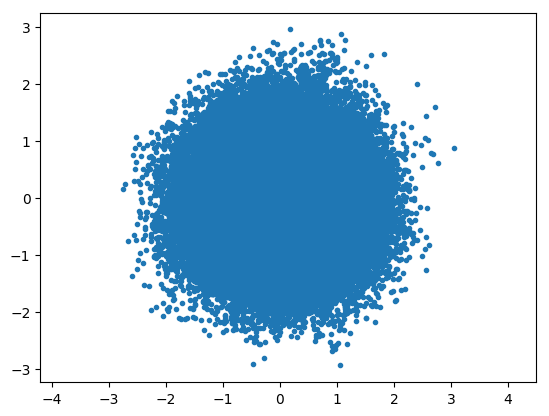

(-3.054017426345907, 3.343419761957086, -3.2370878514161774, 3.248905707605952)

In [5]:
plot(x[1,1:10:end],x[2,1:10:end],".")
axis("equal")

The 2D histogram approximating the underlying probability distribution function

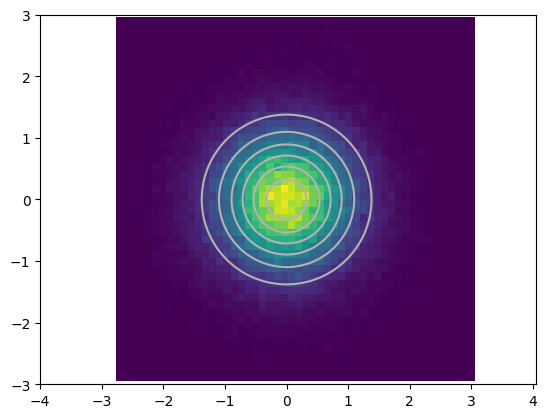

(-3.0, 3.052627162488768, -3.0, 3.0)

In [6]:
hist2d(x,y,N=50) = PyPlot.plt[:hist2d](x,y,N)

hist2d(x[1,1:10:end],x[2,1:10:end],50)
contour(Fx,Fy,copy(F'); colors = [[0.7,0.7,0.7]])
axis("equal")

Try any other function, however note that it must be postive for all $\vec x$.

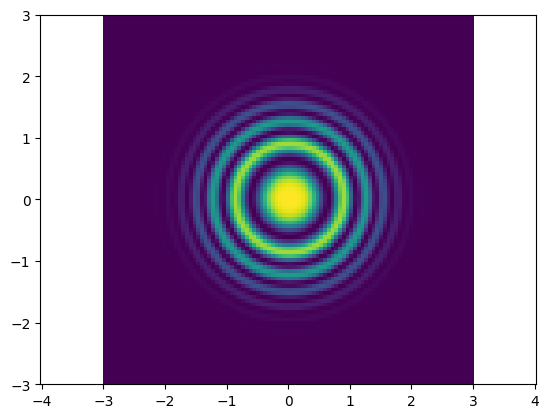

In [7]:
function f2(x)
    r = x'*x
    return exp(-r^2/4) * (cos(4*r))^2
end

Fx,Fy,F = plotF(f2);

In [8]:
size(Fx)

(100,)

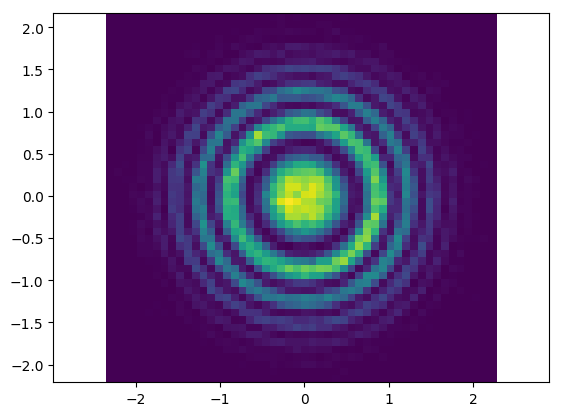

In [9]:
x = metropolis_algorithm(n,niter,nextx,f2)
hist2d(x[1,1:10:end],x[2,1:10:end])
axis("equal");


Too small and too large-steps in $g(\vec x|\vec y) lead to a degradation

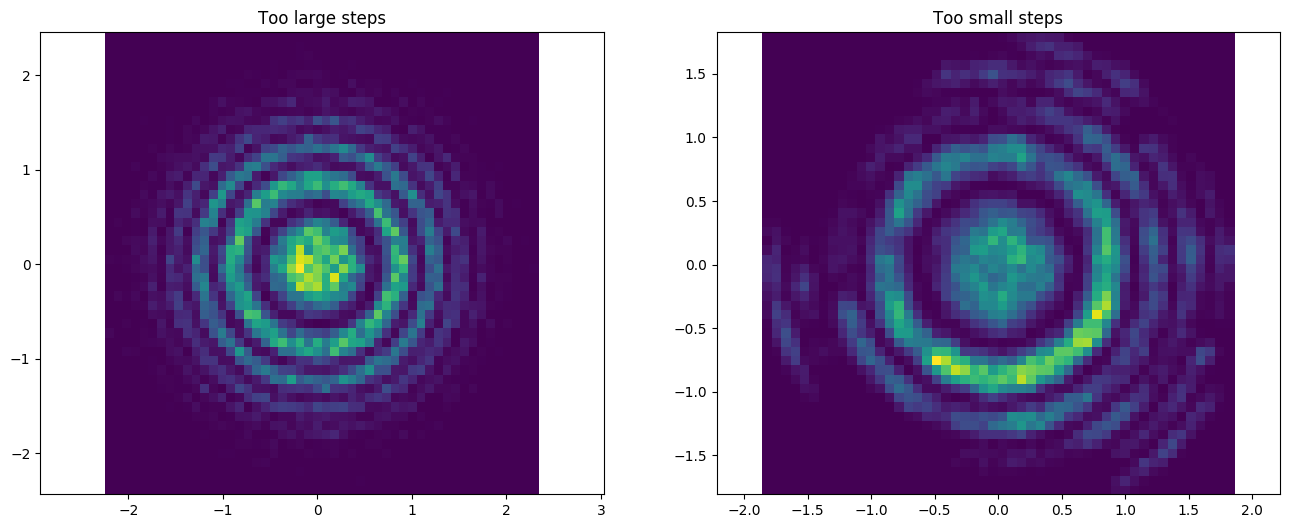

In [10]:
figure(figsize=(16,6))
subplot(1,2,1)
nextx_large_steps(x) = x + 5*randn(size(x))
x = metropolis_algorithm(n,niter,nextx_large_steps,f2)
hist2d(x[1,1:10:end],x[2,1:10:end])
axis("equal")
title("Too large steps")

subplot(1,2,2)
nextx_small_steps(x) = x + 0.01*randn(size(x))
x = metropolis_algorithm(n,niter,nextx_small_steps,f2)
hist2d(x[1,1:10:end],x[2,1:10:end])
axis("equal")
title("Too small steps");
